# Mall Customers - Data Visualization

O objetivo desse notebook é realizar uma Análise Exploratória dos Dados (AED) com o dataset Mall Customers, [disponível aqui](https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv).

## Importar Bibliotecas

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Carregar Dataset

In [85]:
url = 'https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv'
# Carregando dataset em um dataframe Pandas
df_clients = pd.read_csv(url)

### Descrição das colunas:

- CustomerID - ID exclusivo atribuído ao cliente
- Genre - Gênero do cliente
- Age - Idade do cliente
- Annual Income (k$) - Renda anual do cliente
- Spending Score (1-100) - Pontuação atribuída pelo shopping com base no comportamento do cliente e natureza dos gastos

## Trabalhando com o *Dataset* - Análise Exploratória dos Dados

In [86]:
# Conferir dados
print('(linhas, colunas) =', df_clients.shape)
print('Cabecalho =',df_clients.columns.values)

(linhas, colunas) = (200, 5)
Cabecalho = ['CustomerID' 'Genre' 'Age' 'Annual Income (k$)' 'Spending Score (1-100)']


In [87]:
# Verificar tipo de dados e dados faltantes
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [88]:
# Verificando aparência do dataset
df_clients.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [89]:
# Modificando colune Genre para dados Numéricos
df_clients['Genre-Categorical'] = df_clients['Genre']
df_clients['Genre'] = df_clients['Genre'].factorize()[0]
df_clients.head()

# 0 = Male
# 1 = Female

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre-Categorical
0,1,0,19,15,39,Male
1,2,0,21,15,81,Male
2,3,1,20,16,6,Female
3,4,1,23,16,77,Female
4,5,1,31,17,40,Female


In [90]:
# Removendo coluna CustomerID
df_clients = df_clients.drop('CustomerID', axis=1)

In [91]:
# Obtendo algumas métricas dos dados
df_clients.describe()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


### Algumas informações obtidas:
- Média de idade dos clientes é de ~39 anos.
- A idade mínima é de 18 anos, e máxima de 70 anos.
- Desvio padrão (std) de 26,26 anos. (Alto = os valores se dispersam muito da média)

- A média de salário (Annual Income) é de k\$ 60,56.
- Salário máximo de k\$ 137 e mínimo de k\$ 15.
- Desvio padrão de k\$ 26,26 (Alto)

### *Insights* (gráficos)
- Verificar relação entre Gênero e Salário
- Verificar relação entre Idade e Salário
- Verificar relação entre Spending Score e Salário
- Gerar matriz de correlação
- Verificar desvio padrão das features


### Distribuição

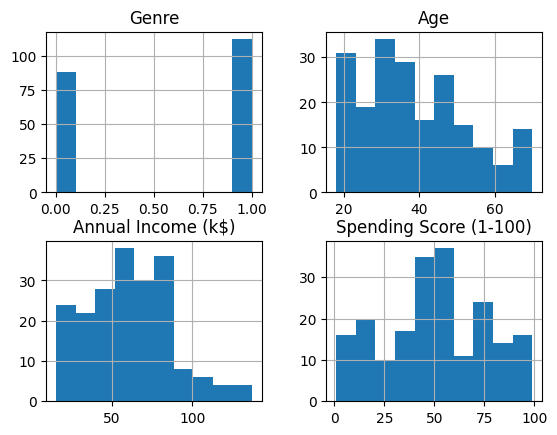

In [24]:
# Histograma da distribuição dos dados
g = df_clients.hist()

#### Observações:
- Há mais mulheres do que homens no conjunto de dados, embora estejam relativamente equilibrados.
- É muito pequeno a quantidade de pessoas com salário anual acima de k\$ 80 em comparação ao resto.
- A concentração maior de idade está abaixo dos 40 anos.
- Há um pico de Spending Score por volta do valor 50.

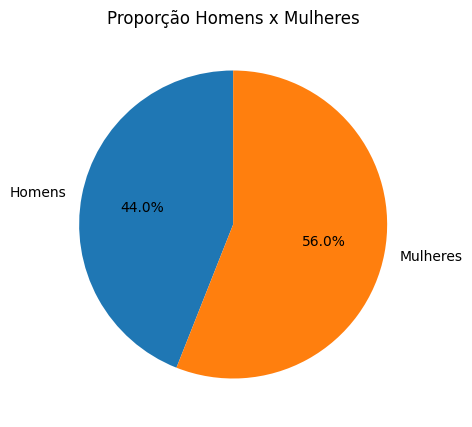

In [59]:
# Gráfico de Pizza (Piechart) da proporção de Homens e Mulheres
genres = ['Homens', 'Mulheres']
data = list(df_clients['Genre'].value_counts())
data.reverse()

fig = plt.figure(figsize=(8, 5))
plt.pie(data, labels = genres, startangle=90, autopct='%1.1f%%')
plt.title('Proporção Homens x Mulheres')
plt.show()

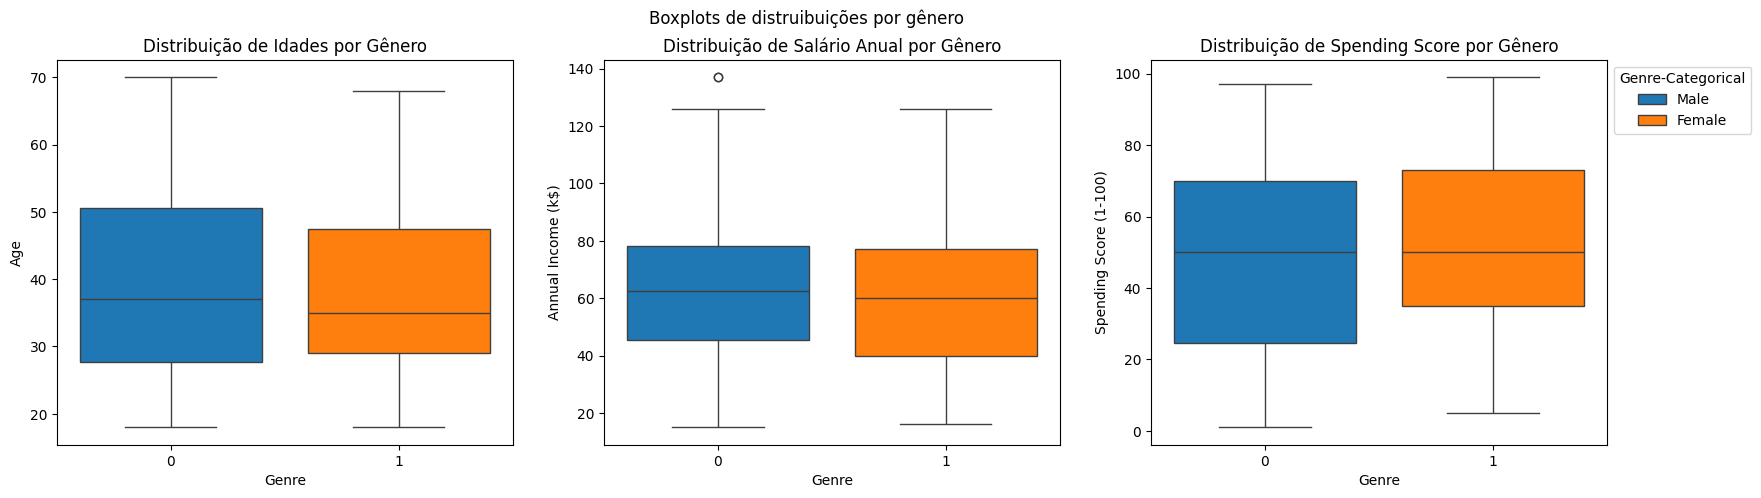

In [119]:
# Define paleta de cores para manter a identidade visual
palette = sns.color_palette('tab10', n_colors=2)

fig, axes = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Boxplots de distruibuições por gênero')

sns.boxplot(ax=axes[0], data=df_clients, x='Genre', y='Age', hue='Genre-Categorical', legend=False, palette=palette, saturation=1.0)
axes[0].title.set_text('Distribuição de Idades por Gênero')

sns.boxplot(ax=axes[1], data=df_clients, x='Genre', y='Annual Income (k$)', hue='Genre-Categorical', legend=False, palette=palette, saturation=1.0)
axes[1].title.set_text('Distribuição de Salário Anual por Gênero')

sns.boxplot(ax=axes[2], data=df_clients, x='Genre', y='Spending Score (1-100)', hue='Genre-Categorical', palette=palette, saturation=1.0)
axes[2].title.set_text('Distribuição de Spending Score por Gênero')
sns.move_legend(axes[2], "upper left", bbox_to_anchor=(1, 1))

In [23]:
# Salario x Idade
# Pizza Genre
# Box plot genre
# Spending Score x